# Axel Alejandro Tlatoa Villavicencio - A01363351
#Ciencia y analítica de datos


# Módulo 5 

La evaluación de un modelo es una indicador del desempeño de un modelo en los problemas reales. Es importante entender que la evaluación de muestra únicamente da información de como el modelo se ajusta a los datos de entrada para luego ser entrenados; sin embargo, no da un estimado de qué tan bien se ajusta el modelo entrenado en problemas de la realidad o que tan bien predice nuevos datos.

Para resolver esto, se busca que los datos se particionen o se dividan en dos segmentos: datos de entrenamiento, y datos de prueba. Los datos de prueba básicamente son usados como datos muestreales de salida. Con esto se aproxima el desempeño del modelo en el mundo real. 

Usualemte cuando se realiza la división de datos se busca que una gran proporción sea usada como datos de entrenamiento, el resto (la menor parte) como datos de prueba. Por ejemplo sea un conjunto de datos de entrenamiento que incluyen el 70% de los datos originales, y el otro 30% se destina para los de prueba. Entonces se usa el conjunto de entrenamiento para construir un modelo y así descubrir las relaciones predictivas, luego se toman los datos de prueba para comparar/evaluar las predicciones del modelo. Al terminar las comparaciones y validar el modelo, se utiliza toda el conjunto original de datos para entrenar el modelo final predictivo. 

En python se usa la paquetería sci-kit con la función para la partición o división de datos denominada **train_test_split()**, está función divide aleatoriamente un conjunto de datos en datos de entrenamiento y datos de prueba como subconjuntos. Ejemplo de validación cruzada:



```
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.3, random_state = 0)
```
los parámetros de entrada son:

* $x_{data}$: variables independientes 
* $y_{data}$: conjunto de datos objetivo, variable dependiente. 

* $test_{size}$: indica el porcentaje destinado en la partición para el subconjunto de prueba en el ejemplo anterior se indicó el 30% por lo tanto $0.3$.

* $random_{state}$: es una semilla generadora de números pseudo-aleatorios que dependiendo de su valor se podrán replicar los mismo modelos para diferentes particiones de datos. 

los parámetros de salida:

* $x_{train},\ y_{train}$: son un arreglo, representan subconjuntos para el entrenamiento del modelo.

* $x_{test}, \ y_{test}$: son otro subconjunto de los datos originales destinados para la prueba. 

**Rendimiento de generalización**

El error de generalización es una medida de qué tan bien los datos predicen datos no vistos previos. El error que se obtiene en los datos de prueba es una aproximación de este error. Usar muchos datos de entranamiento aporta una exactitud más fina en cómo el modelo se desempeñará en problemas del mundo real, pero la precisión del desempeño será baja. 

Para superar está problemática se utiliza validación cruzada, este método permite dividir el conjunto de datos en $k$-grupos iguales; cada grupo es referido como un plegado. Alguno de los pliegues pueden ser ysados como un conjunto de entrenamiento, y el resto de prueba. Por ejemplo, si usamos 4 pliegues, a un pliegue le asignamos datos de prueba y los otros 3 de entrenamiento, entonces se repite para cada pliegue la misma secuencia pero cada plegado será diferente a la selección anterior. Al final se utiliza el promedio de los resultados como un estimado del error de la muestra. Se utiliza **cross_val_score()**.



```
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr,x_data,y_data,cv=3)
```

Primer parámetro es el tipo de modelo que se implementa: Linear Regression (lr), los dos parámetros consecuentes son $x_{data}$, la variable predictora, y $y_{data}$ la variable objetivo. Para el número de particiones se utiliza $cv = $, la función de devuelve un arreglo de la variable scores. 

Para obtener más información del valor de predicción por la validación cruzada utilizamos la función **cross_val_predict()**. Los parámetros de entrada son exactamente los mismos que los de la score pero la salida es una predicción. 

# Selección de modelo

El objetivo de seleccionar un mmodelo es determinar el orden de polinomio que provee el mejor estimado de la función $y(x)$. Cuándo un modelo es muy simple y no puede determinar la mayor parte de los datos a predecir se le conoce como *under-fitting*,  *sub-ajustado* o ***sub-entrenado***. Si se incrementa el orden del polinomio, el modelo tenderá a ajustarse mejor a los datos de entrada; sin embargo no será tan flexible y podrá seguir presentando sub-ajuste. 

$y(x) = b_{0}+b_1+b_2x^{2}$

Hay que tener cuidado con ajustar demasiado un modelo, porque sino el modelo se aprenderá todos los datos de entrada y no hará predicciones cuando se cambien los conjuntos de datos originales, porque de lo contrario estará siempre eligiendo el resultado anterior (aprendido) para diferentes tipos de problemas, a esto se le conoce como ***sobre-entrenado*** o *over-fitting* un sobre-ajuste. 

¿Cómo determinar que grado usar entonces?

La mejor forma de determinar esto, es mediante el método gráfico:

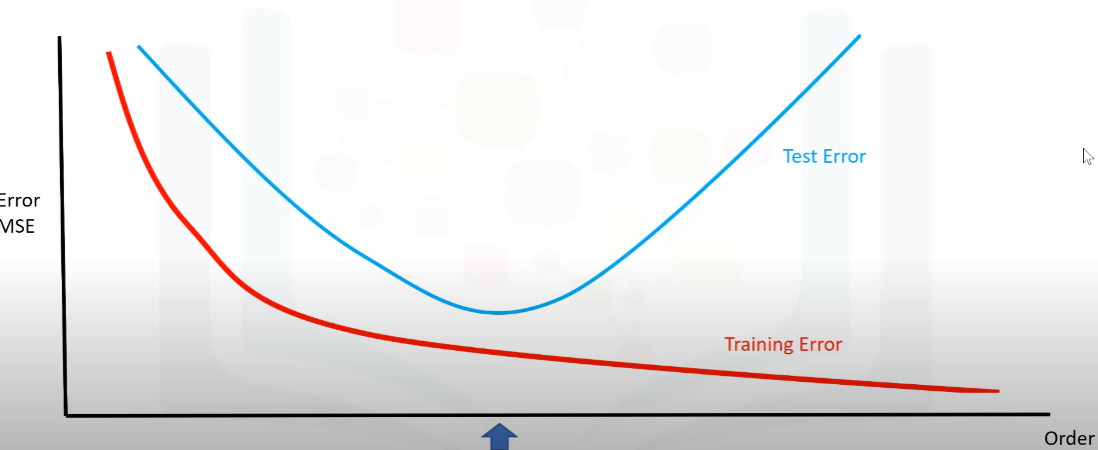

Se grafica el Error MSE contra el órden del polinomio a medida que aumenta el orden del polinomio se disminuye el error de entrenamiento, pero se aumenta el error de prueba, el punto es encontrar el lugar donde ambos sean mínimos. 

# Regresión Ridge 

La regresión Ridge previene el sobre-entrenamiento al controlar la magnitud de los coeficientes polinomiales al introducir un parámetro $α$.

El parámetro $\alpha$ que se selecciona antes del ajuste o entrenamiento del modelo a medida que $\alpha$ incrementa los coeficiente disminuyen en magnitud. Pero se debe tener cuidado ya que a medida que $α → ∞$ los coeficientes $\beta → 0$, y si $α = 0$ evidentemente el sobre-entrenamiento está presente en el modelo. Para seleccionar el parámetro $\alpha$ se utiliza validación cruzada. 



```
from sklearn.linear_model import Ridge
Rid_Model = Ridge(alpha=0.1)
Rid_Model.fit(X,y)

hat_y = Rid_Model.predict(X)
```



Para hacer una predicción y determinar un parámetro $\alpha$ se utilizan datos de entrenamiento, se usa un segundo conjunto llamado validación de datos; que es similar a los datos de prueba, pero con este se seleccionar parámetros como $\alpha$. Se selcciona el parámetro que maximiza $R^{2}$.

# Búsqueda de cuadrícula

La búsqueda de cuadrícula nos permite escanear a través de múltiples parámetros libres con pocas líneas de código. 

Los parámetros como el término $\alpha$ no son parte del ajuste o del proceso de entrenamiento. A estos se les conoce como hiperparámetros. Para encontrar estos hiperparámetros Scikit-lear utiliza el método llamado búsqueda de cuadrícula. Este método toma el modelo u objetos de entrenamiento y los difernetes valores de los hiperparámetros, luego calcula el error cuadrático medio o la R cuadrada para varios valores de hiperparámetros para que la salida tenga los mejores valores. Cada modelo produce un error, se selecciona el hiperparámetro que minimice el error. El valor de la búsqueda de cuadrícula es una lista que contiene un diccionario de python. La llave es el nombre del parámetro libre, el valor son los diferentes valores del hiperparámetro. 



```
parametros_1 = [{'alpha':[0.001,0.1,1,10,100,1000,10000,100000]}]
RR = Ridge()
Grid_1 = GridSearchCV(RR, parameters, cv=4)
Grid_1.fit(x_data[['X','X1',...]],y_data)
Grid_1.best_estimator_
scores = Grid_1.cv_results_
scores['mean_test_score']
```
Grid Search puede normalizar los parámetros de entrada a buscar. 


# Laboratorio

In [4]:
import pandas as pd
import numpy as np

In [5]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [6]:
df = pd.read_csv(path)

In [7]:
df=df._get_numeric_data() # Sacamos únicamente los valores numéricos
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [8]:
#Funciones de graficación.
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [9]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [10]:
y_data = df['price'] # variable objetivo

In [11]:
x_data = df.drop('price',axis=1)

In [12]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [13]:
# Q1.- 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data,y_data,test_size=0.4,random_state=0)
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0]) 

number of test samples : 81
number of training samples: 120


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lre=LinearRegression() # se crea objeto de regresión lineal

In [16]:
lre.fit(x_train[['horsepower']], y_train) # ajustamos el modelo con la variable horsepower

LinearRegression()

In [17]:
lre.score(x_test[['horsepower']], y_test) #obtenemos R^{2} de la data de prueba

0.36358755750788263

In [18]:
lre.score(x_train[['horsepower']], y_train) # Es menor R^{2} en los datos de prueba que en los de entrenamiento

0.6619724197515104

In [19]:
# Q2.-
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)


0.7139364665406973

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [22]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [23]:
print("The mean of the folds is", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds is 0.522009915042119 and the standard deviation is 0.291183944475603


In [24]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [25]:
# Q3.-

cross_val_score(lre, x_data[['horsepower']], y_data, cv = 2).mean()

0.5166761697127429

In [26]:
from sklearn.model_selection import cross_val_predict

In [27]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [28]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [29]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [30]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

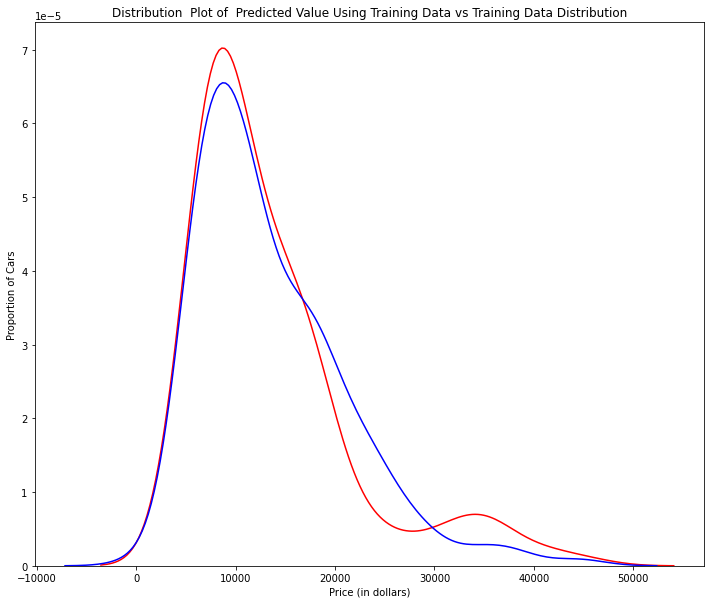

In [32]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

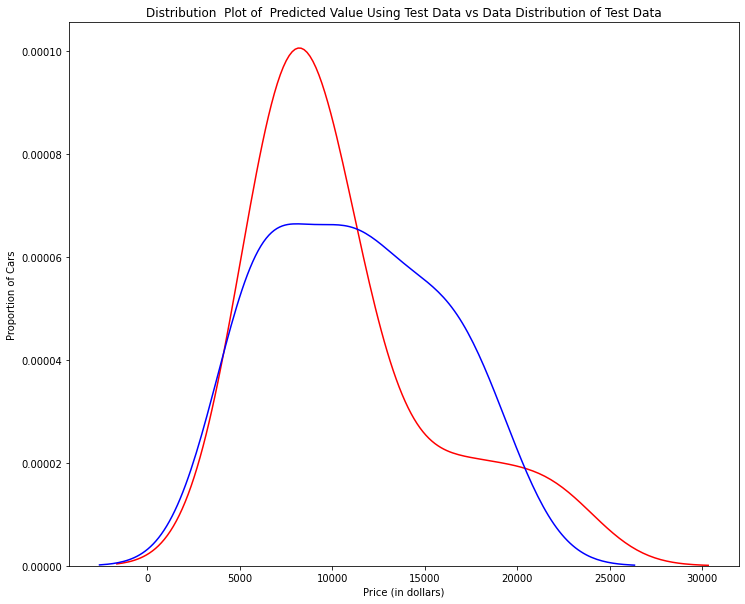

In [33]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [36]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [37]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [38]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [39]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


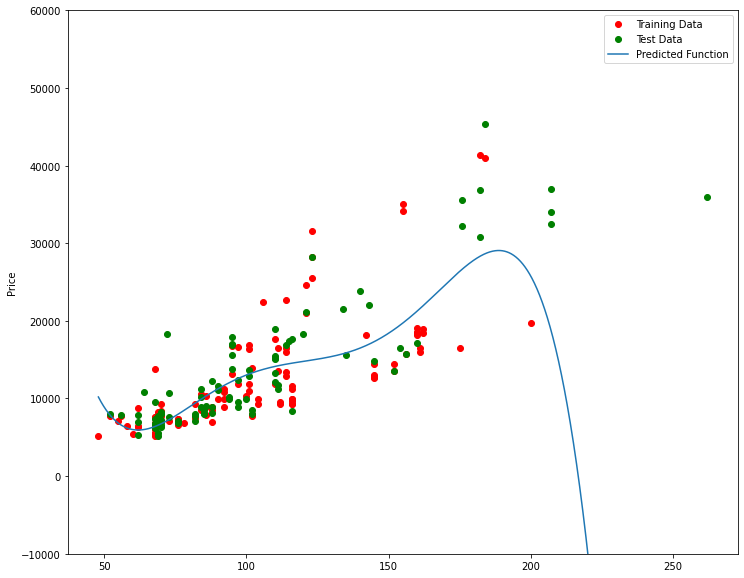

In [40]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [41]:
poly.score(x_train_pr, y_train)

0.556771690212023

In [42]:
poly.score(x_test_pr, y_test)

-29.87134030204415

Una $R^{2}$ negativa es señal de sobre-entrenamiento.

Text(3, 0.75, 'Maximum R^2 ')

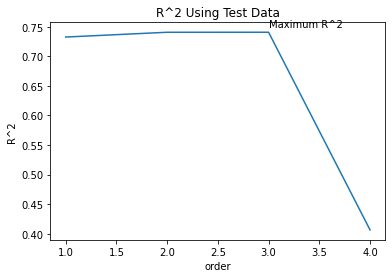

In [43]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [44]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [45]:
from ipywidgets import interact, interactive, fixed, interact_manual
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [46]:
from sklearn.preprocessing import PolynomialFeatures
pr1 = PolynomialFeatures(degree = 2)

In [47]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [48]:
x_train_pr1.shape

(110, 15)

In [49]:
poly1 = LinearRegression().fit(x_train_pr1,y_train)

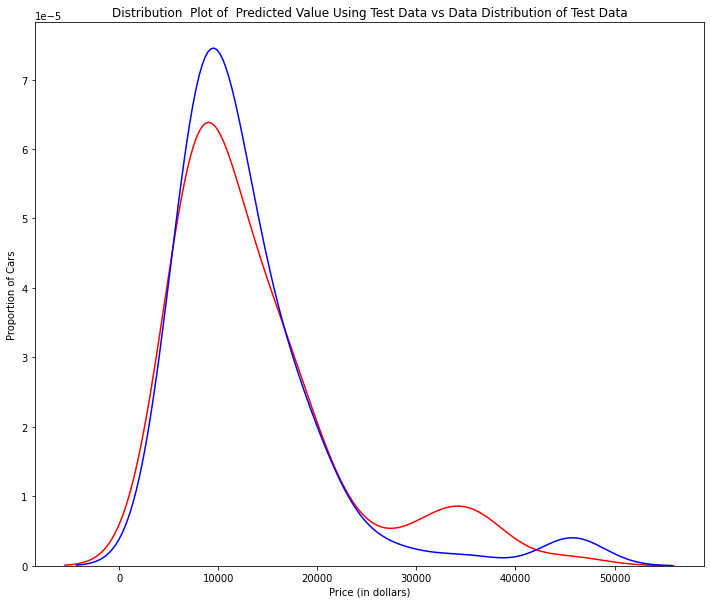

In [50]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [51]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [52]:
from sklearn.linear_model import Ridge

In [53]:
RigeModel=Ridge(alpha=1)

In [54]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [55]:
yhat = RigeModel.predict(x_test_pr)

In [56]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [57]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:06<00:00, 154.12it/s, Test Score=0.564, Train Score=0.859]


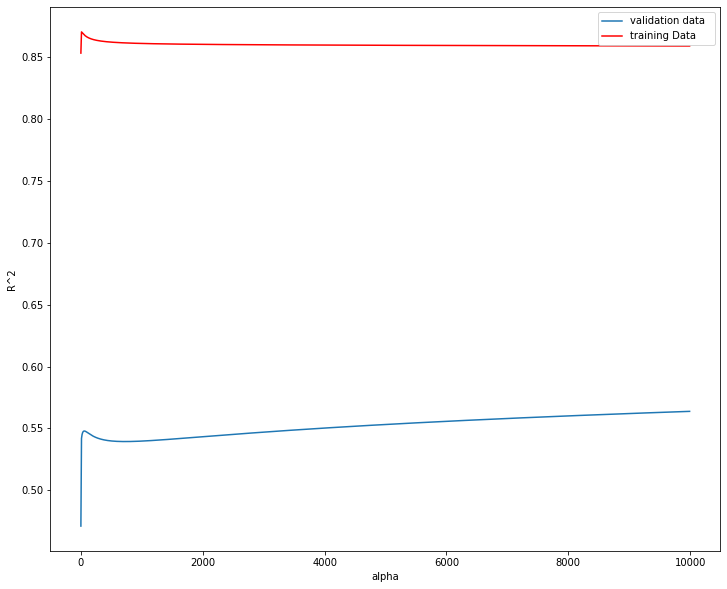

In [58]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [59]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206702

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [63]:
RR=Ridge()
RR

Ridge()

In [64]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [65]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [66]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [67]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151